<center><a target="_blank" href="https://academy.constructor.org/">
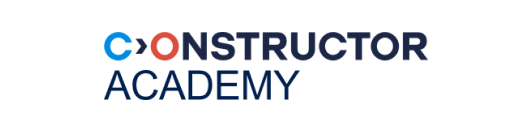</a> </center>
<hr />

# <h1 align="center"> Live coding 3: Google APIs </h1>

<hr />
<center>Constructor Academy, 2024</center>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> learn about google APIs, how to get access to them and how to interact with them.</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Load key from external file</a></li>
            <li> <a style="color:#303030" href='#P2'>Send a Query to the google Maps API</a></li>
        </ol>
        <strong>Topics Trained:</strong> Requests, REST APIs, JSON, YAML, GMAPS API
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/01_DSToolkit/index.html" title="momentum"> Module 2, The Data Science Toolkit </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/01_DSToolkit/day3/index.html" title="momentum">Day 3, JSON, REST APIS, the Request Module </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/01_DSToolkit/day3/pages/DST_D3_LC3_GoogleAPIs.html" title="momentum"> Live Coding 3, Google Maps API</a>
</strong></nav>

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [3]:
import json
import requests
import yaml

<a id='P1' name="P1"></a>
## [Load key from external source](#P0)

If authentication is needed, we provide a personal **key**.   
Our key should be a **secret** from external viewers.

So, if you provide a code to somebody, they will not be able to see your key, but they will be able to use their own.

1. Resources for the companies are not free so for you it also might be “not free” if you use it too much.   
2. Data providers might limit the number of requests/day, demand an API “key”, or take money.   
3. Situation might change as things progress.  
4. Or allow using API only for certain needs (Like LinkedIn).  

**Note**:  
The key is shared via Discord. Please do not abuse it (up to few hundreds requests should be fine). It is attached to our credit card.   

For the exercise session in the afternoon, please set up your own account as explained in the slides.

### Get the key from a .json file

In separate script, write:

In [1]:
# key_dict = {
#     'key':''
# }

In [4]:
with open("credentials.json", "w") as output:
    json.dump(key_dict, output)

In actual script (ie, this notebook, get the key):

In [5]:
key_json = json.load(open("credentials.json"))
# key_json["key"]

In [8]:
# key_json["key"]

### Get the key from a .yaml or .yml file

it is almost like json, just without brackets

```python
!pip install pyyaml # if 'conda install -c anaconda yaml' did not work

import yaml
key_dict = {'key' : 'your_key'}

# dump the key into yaml
with open('credentials.yml','w') as output:
    yaml.dump(key_dict, output)
    
# get the key from .yaml file
key_dict = yaml.load(open('credentials.yml'), Loader=yaml.FullLoader)
key_dict['key']    
```

**Exercise**:

With the key provided create a 'credentials.yml' file as in example and load the key. We will use it to access Google Maps.


In [9]:
import yaml


# dump the key into yaml
with open('credentials.yml','w') as output:
    yaml.dump(key_json, output)
    
# get the key from .yaml file
key_dict = yaml.load(open('credentials.yml'), Loader=yaml.FullLoader)
# key_dict['key']    

In [10]:
key_dict = yaml.load(open("credentials.yml"), Loader=yaml.FullLoader)
gmaps_key = key_dict["key"]
# gmaps_key

### Get the key from Secrets in Google Colab

To store a key securely in Google Colab

1. **Open Secrets**: Click the key icon on the left sidebar in Colab.
2. **Add a New Secret**: Click `+ Add new Secret`, enter the key name and value.
3. **Access the Stored Secret**: Use the code below to retrieve your secret in the notebook:
   ```python
   from google.colab import secrets
   api_key = secrets.get('api_key')
   ```
Replace `'api_key'` with the name of your key.
4. **Grant Access**: give the permission to the notebook to retrieve the key

This approach ensures that your API keys or other sensitive information are kept secure and private in your Colab projects.

In [ ]:
# from google.colab import userdata
# gmaps_key = userdata.get('google_key')

<a id='P2' name="P2"></a>
## [Send a Query to the google Maps API](#P0)

Documentation Text search:  https://developers.google.com/maps/documentation/places/web-service/text-search

example stackoverflow: https://stackoverflow.com/questions/77890446/how-to-call-via-google-places-apinew-text-search-id-only-in-python


In [18]:
url = "https://places.googleapis.com/v1/places:searchText"

query = "constructor academy" #input("Search query: ")

headers = {
    'X-Goog-FieldMask': 'places.displayName,places.formattedAddress',
    'Content-Type': 'application/json',
    'X-Goog-Api-Key': key_json["key"]
}

data = {
  "textQuery" : query
}

places_json = requests.post(url, headers=headers, json=data).json()

In [19]:
places_json

{'places': [{'formattedAddress': 'Lintheschergasse 7, 8001 Zürich, Switzerland',
   'displayName': {'text': 'Constructor Academy', 'languageCode': 'en'}}]}

In [20]:
url = "https://places.googleapis.com/v1/places:searchText"

query = input("Search query: ")

headers = {
    'X-Goog-FieldMask': '*',
    'Content-Type': 'application/json',
    'X-Goog-Api-Key': key_json["key"]
}

data = {
  "textQuery" : query
}

places_json = requests.post(url, headers=headers, json=data).json()

Search query:  uetliberg


In [21]:
places_json

{'places': [{'name': 'places/ChIJzVWL8qEJkEcRILng_v2ccPg',
   'id': 'ChIJzVWL8qEJkEcRILng_v2ccPg',
   'types': ['natural_feature', 'establishment'],
   'formattedAddress': 'Uetliberg, 8143 Stallikon, Switzerland',
   'addressComponents': [{'longText': 'Uetliberg',
     'shortText': 'Uetliberg',
     'types': ['natural_feature', 'establishment'],
     'languageCode': 'en'},
    {'longText': 'Stallikon',
     'shortText': 'Stallikon',
     'types': ['locality', 'political'],
     'languageCode': 'en'},
    {'longText': 'Affoltern District',
     'shortText': 'Affoltern District',
     'types': ['administrative_area_level_2', 'political'],
     'languageCode': 'en'},
    {'longText': 'Zurich',
     'shortText': 'ZH',
     'types': ['administrative_area_level_1', 'political'],
     'languageCode': 'en'},
    {'longText': 'Switzerland',
     'shortText': 'CH',
     'types': ['country', 'political'],
     'languageCode': 'en'},
    {'longText': '8143',
     'shortText': '8143',
     'types':

### Below is old api which you can use for inspiration but request itself would not work

Documentation textsearch Legacy(old):  https://developers.google.com/maps/documentation/places/web-service/legacy/search-text

In [3]:
url = "https://maps.googleapis.com/maps/api/place/textsearch/json?"

# text string on which to search
query = input("Search query: ")

# actual api key
api_key = key_dict['key']

# get method of requests module, return response object
req = requests.get(url + "query=" + query + "&key=" + api_key)

# json method of response object: json format data -> python format data
places_json = req.json()

# now result contains list of nested dictionaries
my_result = places_json["results"]

# take a look at the first element
my_result[0]

Search query:  constructor academy


IndexError: list index out of range

In [5]:
places_json

{'error_message': 'You’re calling a legacy API, which is not enabled for your project. To get newer features and more functionality, switch to the Places API (New) or Routes API. Learn more: https://developers.google.com/maps/legacy#LegacyApiNotActivatedMapError',
 'html_attributions': [],
 'results': [],
 'status': 'REQUEST_DENIED'}

In [ ]:
len(my_result)

2

In [ ]:
# keep looping through the result items to extract information of interest
for item in my_result:

    # Print value corresponding to the 'name' key
    print(item["name"])

Constructor Academy
Constructor Academy


In [ ]:
my_result[0]["geometry"]  # 'location' is a point feature of GeoJSON

{'location': {'lat': 48.1406038, 'lng': 11.5350703},
 'viewport': {'northeast': {'lat': 48.14183602989272,
   'lng': 11.53658217989272},
  'southwest': {'lat': 48.13913637010727, 'lng': 11.53388252010728}}}

The features include:    
points  - therefore addresses and locations;   
line strings - therefore streets, highways and boundaries;  
polygons - countries, provinces, tracts of land;   
and multi-part collections of these types.

**Exercise** 15 min:

Where will you go for lunch when the restaurants reopen?     
or   
What are the addresses and ratings of the restaurants we just found?


<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>